# Finding Topological Order in a Graph

implementaion of Node Class :

In [18]:
class Node :

    def __init__(self ,id):
        self.id = id
        self.incomingNodes = []
        self.outgoingNodes = []
        self.incomingCounter = 0
        self.visited = False

    def addIncomingNode(self,node):
        self.incomingCounter += 1
        self.incomingNodes.append(node)

    def removeIncomingNode(self,node):
        if node in self.incomingNodes :
            self.incomingCounter -= 1
            self.incomingNodes.remove(node)
            return True
        else :
            return False

    def addOutgoingNode(self,node):
        self.outgoingNodes.append(node)

implementation of Graph Class

In [19]:
class Graph :
    def __init__(self ,vertexNum):

        self.vertexNum = vertexNum
        self.nodes = list(range(vertexNum))
        for node in range(vertexNum) :
            self.addNode(Node(node))

    def addNode(self,node):
        self.nodes[node.id] = node


    def addEdge(self,outNode,inNode):
        "creating an edge from outNode to inNode"
        self.nodes[outNode].addOutgoingNode(self.nodes[inNode])
        self.nodes[inNode].addIncomingNode(self.nodes[outNode])


Initializing the sample Graph :

In [20]:
def graphInitializer() :
    "a method for creating the graph and finding nodes with zero incoming in it"
    g = Graph(6)
    g.addEdge(5, 2);
    g.addEdge(5, 0);
    g.addEdge(4, 0);
    g.addEdge(4, 1);
    g.addEdge(2, 3);
    g.addEdge(3, 1);

    return g

Algorithm of finding diffrent topologicalOrders in a graph :

In [21]:
def topologicalOrdersFinder(graph,toList=[]) :

    if len(toList) == graph.vertexNum  :
        print([i.id for i in toList])
        return

    for node in graph.nodes :

        if node.incomingCounter == 0 and not node.visited :
            node.visited = True
            for adjNode in node.outgoingNodes :
                adjNode.removeIncomingNode(node)

            toList.append(node)
            topologicalOrdersFinder(graph,toList)

            for adjNode in node.outgoingNodes :
                adjNode.addIncomingNode(node)
            toList.remove(node)
            node.visited = False

running the algorithm :

In [22]:
topologicalOrdersFinder(graphInitializer())

[4, 5, 0, 2, 3, 1]
[4, 5, 2, 0, 3, 1]
[4, 5, 2, 3, 0, 1]
[4, 5, 2, 3, 1, 0]
[5, 2, 3, 4, 0, 1]
[5, 2, 3, 4, 1, 0]
[5, 2, 4, 0, 3, 1]
[5, 2, 4, 3, 0, 1]
[5, 2, 4, 3, 1, 0]
[5, 4, 0, 2, 3, 1]
[5, 4, 2, 0, 3, 1]
[5, 4, 2, 3, 0, 1]
[5, 4, 2, 3, 1, 0]


# Priority Queue

<div style="direction:rtl">   صف اولویت ساختمان داده ای مانند صف و پشته است که هر عضو آن دارای یک اولویت است و قابلیت انجام عملیات های زیر را دارد: </div>

<ul style="direction:rtl">
    <li>اضافه کردن عضوی با اولویت دلخواه (پیچیدگی زمانی (O(lgn) </li>
    <li> حذف کردن عضوی با کمترین/بیشترین اولویت‌ (پیچیدگی زمانی (O(lgn) </li>
    <li>حذف کردن عضو دلخواه (پیچیدگی زمانی (O(lgn)</li>
    <li>بازگرداندا عضوی با کمترین/بیشترین اولویت (پیچیدگی زمانی (O(1)</li>
</ul>

## Priority Queue Features

<div style="direction:rtl"> صف های اولویت معمولا با درخت heap پیاده سازی می شوند که دارای ویژگی های زیر است : </div>

<ul style="direction:rtl">
    <li>درخت دودویی کامل است. </li>
    <li> برگ های سطح آخر آن از سمت چپ چیده شده است. </li>
    <li>کلید هر عضو آن از مقدار کلیدهای فرزندانش کوچکتر است(صف اولویت کمینه).</li>
    <li>ریشه کوچکترین عضو در درخت min-heap است.</li>
    <li>در صورت دارا بودن n عضو ارتفاعش برابر با (o(lgn است.</li>
    <li>اعمال درج و حذف کوچکترین عضو از مرتبه (lg(n است.</li>
</ul>

<img src="photoes/PriorityQueueImplementation.png"></img>

## Implementation of Priority Queue with Array

<div style="direction:rtl"> پیاده سازی صف اولویت با استفاده از درخت heap که به کمک ارایه :</div>

<ul style="direction:rtl">
    <li>ریشه در [heapList[1 </li>
    <li> فرزند چپ عضو i ام در [heapList[2i </li>
    <li>فرزند راست عضو i ام در [heapList[2i +1</li>
    <li>پدر عضو i ام در [heapList[i//2</li>
</ul>

In [12]:
class MinHeap:
    def __init__(self):
        self.heapList = [0]
        self.currentSize = 0

    def getMin(self):
        if self.currentSize != 0  :
            return self.heapList[1]

    def parent(self, i):
        return  i // 2

    def leftChild(self, i):
        return  i * 2

    def rightChild(self, i):
        return  i * 2 + 1

    def size(self):
        return self.currentSize

    def upHeapify(self, i):
        '''switching childs with their parent if parent was smaller than its child
        starting from i'''
        while i // 2 > 0:
            if self.heapList[i] < self.heapList[self.parent(i)]:
                tmp = self.heapList[self.parent(i)]
                self.heapList[i // 2] = self.heapList[i]
                self.heapList[i] = tmp
            i = self.parent(i)


    def downHeapify(self, i):
        '''switching parents with their minchild if minchild was smaller than its parent,
        starting from i'''
        while self.leftChild(i) < self.currentSize:
            mc = self.minChild(i)
            if self.heapList[i] > self.heapList[mc]:
                tmp = self.heapList[i]
                self.heapList[i] = self.heapList[mc]
                self.heapList[mc] = tmp
            i = mc


    def push(self, k):
        "inserting element to heaplist and up heapifying it for making it ordered again"
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.upHeapify(self.currentSize)


    def increaseKeyValue(self,i,value) :
        self.heapList[i] = value
        self.downHeapify(i)

    def minChild(self, i):
        "as we know : childs of node in index i indexed at i*2 and i*2 + 1 index of heaplist"
        if (self.rightChild(i) >= self.currentSize) or \
                (self.heapList[self.leftChild(i)] < self.heapList[self.rightChild(i)]):
            return self.leftChild(i)
        else:
            return self.rightChild(i)


    def delMin(self):
        if self.currentSize != 0 :
            retval = self.heapList[1]
            self.heapList[1] = self.heapList[self.currentSize]
            self.currentSize = self.currentSize - 1
            self.heapList.pop()
            self.downHeapify(1)
            return retval


    def buildHeap(self, alist):
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        while (i > 0):
            self.downHeapify(i)
            i = i - 1

# Interval Partitioning Without Priority Queue

Dependencies which we needed during implementing algorithm

In [22]:
from random import randint
import time
import matplotlib.pyplot as plt

This function will check if there is a free class ,and if such class exist ,it will return the number of the class.

In [23]:
def isFree(classFinishTimes,start_time) :
    for clasNum in range(len(classFinishTimes)) :
        if start_time >= classFinishTimes[clasNum] :
            return clasNum
    return None

Implementation of Algorithm :

In [15]:
def naiveIntervalPartiotioningAlgorithm(start_times,finish_times) :
    begin = time.time()
    classFinishTimes = []
    for i in range(len(start_times)) :
        freeClass = isFree(classFinishTimes,start_times[i])
        if  freeClass != None :
            classFinishTimes[freeClass] = finish_times[i]
        else :
            classFinishTimes.append(finish_times[i])

    return time.time() - begin

# Interval Partitioning With Priority Queue

Implementation of Algorithm :

In [26]:
def proIntervalPartiotioningAlgorithm(start_times,finish_times) :
    begin = time.time()
    classFinishTimes = MinHeap()
    for i in range(len(start_times)):
        # print("min " ,classFinishTimes.getMin())
        # print("start " , start_times[i])
        # print("finish " ,finish_times[i])
        if classFinishTimes.size() != 0 :
            if classFinishTimes.getMin() <= start_times[i] :
                classFinishTimes.increaseKeyValue(1,finish_times[i])
            else :
                classFinishTimes.push(finish_times[i])
        else :
            classFinishTimes.push(finish_times[i])
        # print("size " , classFinishTimes.size())
    return time.time() - begin

# Initializing The startTime and finishTime randomly

Initializing start times and finish times randomly and sort them in base of finish times

In [27]:
def initializingLists(num):


    start_times = []
    finish_times = []
    for i in range(num) :
        start_times.append(randint(0,num * 100))
        finish_times.append(start_times[i] + randint(0,num * 100))
    #sorting two list toghether in base of start_times
    start_times,finish_times = zip(*sorted(zip(start_times, finish_times)))

    return start_times,finish_times

Creating 5000 test cases and testing them on each above algorithms then painting their plots :

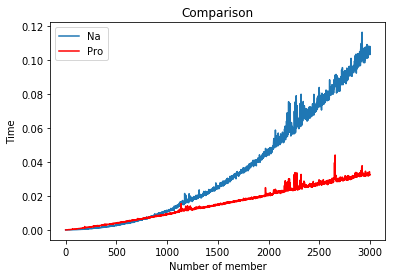

In [29]:
naiveTime = []
proTime = []
for i in range(1,3000) :
    start_times,finish_times = initializingLists(i)
    naiveTime.append(naiveIntervalPartiotioningAlgorithm(start_times,finish_times))
    proTime.append(proIntervalPartiotioningAlgorithm(start_times,finish_times))

plt.plot(list(range(1,3000)),naiveTime,label="Na")
plt.plot(list(range(1,3000)),proTime,color = "r",label="Pro")
plt.xlabel('Number of member')
plt.ylabel('Time')
plt.title('Comparison')
plt.legend()
plt.show()